In [9]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import SmartBrokerEnv
from agents.sac import SAC
from networks.sac.continuous.policy_net_l import PolicyNetworkLSTM

import matplotlib.pyplot as plt

norm_cols = ['Volume XRP']
cols = ['date'] + ['open', 'high', 'low', 'close', f'Volume XRP']
batch_dur = 15
env = SmartBrokerEnv(
    batch_dur=batch_dur,
    df_info={
        'start_date': '2021-01-01',
        'end_date': '2021-02-01',
        'norm_cols': norm_cols,
        'cols': cols,
    },
    portfolio={

    },
)
sac = SAC(
    env=env,
    name='smart_broker',
    input_dim=env.observation_space.shape[0],
    log_freq=1,
    hyprprms={
        'mem_sz': 500,
        'lr': 0.0004,
        'batch_size': 1,

    },
    networks={
        'policy_net': PolicyNetworkLSTM(
            state_dim=env.observation_space.shape[0],
            action_dim=env.action_space.shape[0],
            eps=1e-6,
        ),
    },
    p_net_type='lstm',
)

In [ ]:
sac.run(5000)

collecting experience...

Ep: 0 | TS: 19970 | L: 788729.22 | R: -41.39 | R.Avg.R: -41.39 | P: 20.63 | R.Avg P: 20.63 | B: 62.02 | R.Avg B: 62.02 | R.Avg.U: 216
Ep: 1 | TS: 39940 | L: 9493842.18 | R: -25.81 | R.Avg.R: -36.2 | P: 56.11 | R.Avg P: 38.37 | B: 81.91 | R.Avg B: 71.96 | R.Avg.U: 242
Ep: 2 | TS: 59910 | L: 17027539.67 | R: -49.21 | R.Avg.R: -36.72 | P: 10.97 | R.Avg P: 29.24 | B: 60.21 | R.Avg B: 68.05 | R.Avg.U: 224
Ep: 3 | TS: 79880 | L: 22376305.68 | R: -56.46 | R.Avg.R: -41.33 | P: -3.82 | R.Avg P: 20.97 | B: 52.63 | R.Avg B: 64.19 | R.Avg.U: 209
Ep: 4 | TS: 99850 | L: 22722175.23 | R: -54.39 | R.Avg.R: -44.46 | P: -1.56 | R.Avg P: 16.47 | B: 52.84 | R.Avg B: 61.92 | R.Avg.U: 201
Ep: 5 | TS: 119820 | L: 18084541.9 | R: -46.16 | R.Avg.R: -45.52 | P: 13.83 | R.Avg P: 16.03 | B: 59.99 | R.Avg B: 61.6 | R.Avg.U: 200
Ep: 6 | TS: 139790 | L: 19999386.94 | R: -50.97 | R.Avg.R: -45.99 | P: 4.99 | R.Avg P: 14.45 | B: 55.96 | R.Avg B: 60.79 | R.Avg.U: 198
Ep: 7 | TS: 159760 | L: 189

/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/vinay/miniforge3/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


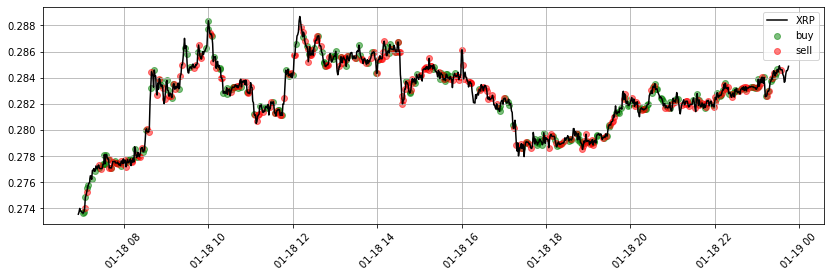

Avg.Rewards: -53.76 | Tot.Profit: 816.95 | Avg.Profit: 0.82 | Avg.Units: 163 


In [7]:
sac.evaluate(start_dt='2021-01-18 07:00', duration=1000)

## Visualizations

### Training

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in sac.logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')

### Evaluation

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(16, 12))
r_avg_rewards = []
r_avg_profits = []
r_avg_bal = []
r_avg_units_held = []
r_avg_loss = []
r_avg_net_worth = []
count = 0

for _, log in sac.eval_logs.items():
    r_avg_rewards.append(log['r_avg_reward'])
    r_avg_profits.append(log['r_avg_profit'])
    r_avg_bal.append(log['r_avg_bal'])
    r_avg_units_held.append(log['r_avg_units_held'])
    r_avg_loss.append(log['r_avg_loss'])
    r_avg_net_worth.append(log['r_avg_net_worth'])
    count += 1

ax[0][0].plot(range(count), r_avg_loss)
ax[0][0].set_title('Rolling avg loss per episode')

ax[0][1].plot(range(count), r_avg_rewards)
ax[0][1].set_title('Rolling avg reward per episode')

ax[1][0].plot(range(count), r_avg_profits)
ax[1][0].set_title('Rolling avg profit per episode')

ax[1][1].plot(range(count), r_avg_units_held)
ax[1][1].set_title('Rolling avg units held per episode')

ax[2][0].plot(range(count), r_avg_net_worth)
ax[2][0].set_title('Rolling avg net worth per episode')

ax[2][1].plot(range(count), r_avg_bal)
ax[2][1].set_title('Rolling avg balance per episode')